In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy.stats as sp
import datetime as dt
import math
import warnings
warnings.simplefilter('ignore')

<h2>PART 1

<h3> 1

In [2]:
trends_df = pd.read_csv('trends1.csv')
trends_df = trends_df.loc[:, ~trends_df.columns.str.contains('^Unnamed')] #dropping innamed columns 

In [3]:
trends_df["date"] = pd.to_datetime(trends_df['date'])
trends_df = trends_df.sort_values(by='date',ascending=True)

In [4]:
trends_df['month_year'] = trends_df['date'].apply(lambda x:x.strftime('%Y-%m')) 

<h4> Grouped by Month as we can see that,these are the weekly sales<br>and we can use monthly data for clear understanding of the sales trend

In [5]:
df_monthly_sales=trends_df.groupby('month_year').sum().reset_index()
df_monthly_sales['month_year'] = pd.to_datetime(df_monthly_sales['month_year'])

In [6]:
df_monthly_sales.set_index('month_year',inplace=True)

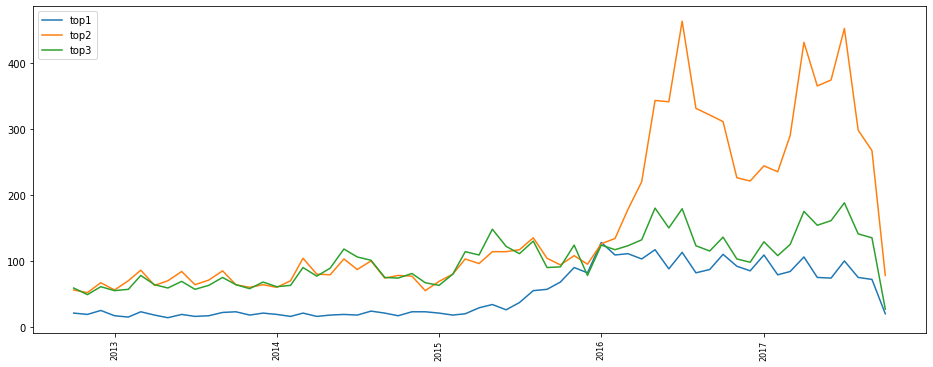

In [7]:
plt.figure(figsize=(16,6))
plt.xticks(rotation='vertical',size = 8)
top1, = plt.plot(df_monthly_sales['top 1'],label="top1")
top2, = plt.plot(df_monthly_sales['top 2'],label="top2")
top3, = plt.plot(df_monthly_sales['top 3'],label="top3")
leg = plt.legend(loc='upper left')
plt.show()

<h4> This graph represents all the ratings graph  

In [191]:
def draw_trend_line(trend,xf1,yf,name = '',last_n_month=0):
    f, ax = plt.subplots(1, 1)
    ax.plot(xf1, yf,label='Linear fit {}'.format(name), lw=5)
    trend[-last_n_month:].plot(ax=ax,marker='.', ls='')
    plt.ylabel('trends growth')
    ax.legend()

In [192]:
def calculte_and_show_slope(trend,last_n_month=0,name=''): 
    y=np.array(trend[-last_n_month:].values, dtype=float)
    x=np.array(pd.to_datetime(trend[-last_n_month:].index).values, dtype=float)
    x1 = np.array(pd.to_datetime(trend[-last_n_month:].index).map(dt.datetime.toordinal), dtype=float) 
    
    slope1, _, _, _, _ =sp.linregress(x1,y)
    slope, intercept, r_value, p_value, std_err =sp.linregress(x,y) 
    xf = np.linspace(min(x),max(x),100)
    xf1 = xf.copy()
    xf1 = pd.to_datetime(xf1)
    yf = (slope*xf)+intercept
    # print('r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err)
    draw_trend_line(trend,xf1,yf,name,last_n_month)
    return slope1

In [10]:
def calculate_and_show_trend(analysis):
    decompose_result_mult = seasonal_decompose(analysis, model="multiplicative",extrapolate_trend= 'freq')
    trend = decompose_result_mult.trend
    seasonal = decompose_result_mult.seasonal
    residual = decompose_result_mult.resid
    return trend

top 1 groth rate 5.598002703633812


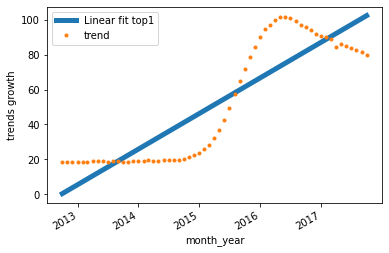

In [193]:
analysis1 = df_monthly_sales[['top 1']].copy()
trend1 = calculate_and_show_trend(analysis1)
top1_groth = calculte_and_show_slope(trend1,name ='top1')
print('top 1 groth rate {}'.format(top1_groth*100))

top 2 groth rate 18.54158461448747


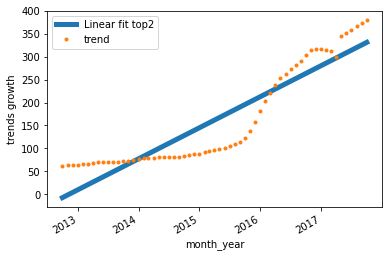

In [194]:
analysis2 = df_monthly_sales[['top 2']].copy()
trend2 = calculate_and_show_trend(analysis2)
top2_groth =calculte_and_show_slope(trend2,name ='top2')
print('top 2 groth rate {}'.format(top2_groth*100))

top 3 groth rate 5.44698582443648


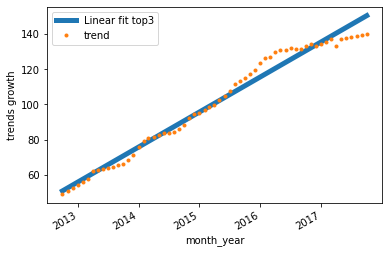

In [195]:
analysis3 = df_monthly_sales[['top 3']].copy()
trend3 = calculate_and_show_trend(analysis3)
top3_groth =calculte_and_show_slope(trend3,name ='top3')
print('top 3 groth rate {}'.format(top3_groth*100))

<h4> from this monthly data plot we can see top 2 is the best performing .<br>
    because we can observe an uptrend that is 18.54% clearly significatly higher than<br>
    top 1 (5.598%) and top3 (5.4469%)<br>
    so the bet performing serial is<br>
    - top2 with 18.54% trend<br>
    - top1 with 5.598% trend<br>
    - top3 with 5.4469% trend<br>
    

<h3> 2 a and b

In [196]:
class ScoreInterpret:
    
    def __init__(self,top):
        self.top = top.copy()
        # self.last_12m()
    
    def calculte_slope(self,last_n_month=0,name=''):
        y=np.array(self.trend[-last_n_month:].values, dtype=float)
        x=np.array(pd.to_datetime(self.trend[-last_n_month:].index).values, dtype=float)
        x1 = np.array(pd.to_datetime(self.trend[-last_n_month:].index).map(dt.datetime.toordinal), dtype=float) 

        self.slope, _, _, _, _ =sp.linregress(x1,y)
        
        # print('r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err)
        # draw_trend_line(trend,xf1,yf,name)
        slope1, intercept, r_value, p_value, std_err =sp.linregress(x,y) 
        xf = np.linspace(min(x),max(x),100)
        xf1 = xf.copy()
        xf1 = pd.to_datetime(xf1)
        yf = (slope1*xf)+intercept
        f, ax = plt.subplots(1, 1)
        ax.plot(xf1, yf,label='Linear fit {}'.format(name), lw=5)
        self.trend[-last_n_month:].plot(ax=ax,marker='.', ls='')
        plt.ylabel('trends growth')
        ax.legend()
    
    def calculate_trend(self):
        decompose_result_mult = seasonal_decompose(self.top, model="multiplicative",extrapolate_trend= 'freq')
        trend = decompose_result_mult.trend
        seasonal = decompose_result_mult.seasonal
        residual = decompose_result_mult.resid
        self.trend = trend
        
    def last_12m(self):
        self.calculate_trend()
        self.calculte_slope(last_n_month=12,name=self.top.columns[-1])
    
    def perf_12m(self):
        msg = "Top"+self.top.columns[-1].split()[-1]+"'s performance for the last 12 months is "+ format(self.slope*100,".2f")+"%"
        key = self.top.columns[-1].replace(" ", "")
        trend_dict = {key:msg} 
        print(trend_dict)
    
        

<h3> 3

In [197]:
si=ScoreInterpret(df_monthly_sales[['top 1']])
si1= ScoreInterpret(df_monthly_sales[['top 2']])
si2= ScoreInterpret(df_monthly_sales[['top 3']])

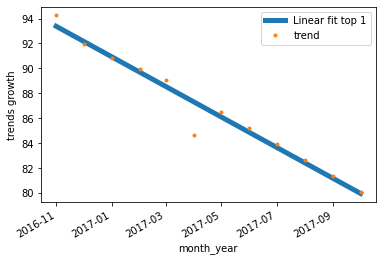

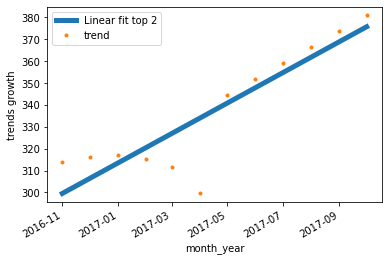

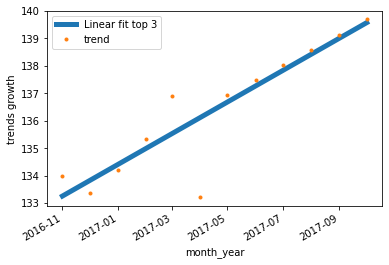

In [198]:
si.last_12m()
si1.last_12m()
si2.last_12m()

In [199]:
si.perf_12m()
si1.perf_12m()
si2.perf_12m()

{'top1': "Top1's performance for the last 12 months is -4.02%"}
{'top2': "Top2's performance for the last 12 months is 22.77%"}
{'top3': "Top3's performance for the last 12 months is 1.89%"}


<h2> Part 2

<h3> 1

In [200]:
pred_df = pd.read_csv('predictions.csv') 

In [201]:
pred_df = pred_df.loc[:, ~pred_df.columns.str.contains('^Unnamed')]

In [202]:
pred_df["date"] = pd.to_datetime(pred_df['date'])
pred_df = pred_df.sort_values(by='date',ascending=True)
pred_df.set_index('date',inplace=True)

In [203]:
col_names = pred_df.columns
col_top1 =  [i for i in col_names if 'top 1' in i]
col_top2 =  [i for i in col_names if 'top 2' in i]
col_top3 =  [i for i in col_names if 'top 3' in i]

In [204]:
pred_top1 = pred_df[col_top1]
pred_top2 = pred_df[col_top2]
pred_top3 = pred_df[col_top3]

In [205]:
act_top1 = trends_df[['date','top 1']]
act_top1.set_index('date',inplace=True)
act_top2 = trends_df[['date','top 2']]
act_top2.set_index('date',inplace=True)
act_top3 = trends_df[['date','top 3']]
act_top3.set_index('date',inplace=True)

<h4> calculating error (difference from the actual value)

In [206]:
err_top1 = pred_top1.sub(act_top1['top 1'],axis =0)
err_top2 = pred_top2.sub(act_top2['top 2'],axis =0)
err_top3 = pred_top3.sub(act_top3['top 3'],axis =0)

<h4> calculating error square 

In [207]:
def calculate_square(sub_df):
    cols = sub_df.columns
    for col in cols:
        sub_df[col]=sub_df[col]**2
    return sub_df

In [208]:
err_top1['fit top 1']=err_top1['fit top 1']**2
err_top1['fit2 top 1']=err_top1['fit2 top 1']**2
err_top1['fit3 top 1']=err_top1['fit3 top 1']**2

In [209]:
err_top2['fit top 2']=err_top2['fit top 2']**2
err_top2['fit2 top 2']=err_top2['fit2 top 2']**2
err_top2['fit3 top 2']=err_top2['fit3 top 2']**2

In [210]:
err_top3['fit top 3']=err_top3['fit top 3']**2
err_top3['fit2 top 3']=err_top3['fit2 top 3']**2
err_top3['fit3 top 3']=err_top3['fit3 top 3']**2

<h4> adding all the error square for evaluating fits

In [211]:
fit_top_1 = err_top1['fit top 1'].sum()
fit2_top_1 = err_top1['fit2 top 1'].sum()
fit3_top_1 = err_top1['fit3 top 1'].sum()

In [212]:
fit_top_2 = err_top2['fit top 2'].sum()
fit2_top_2 = err_top2['fit2 top 2'].sum()
fit3_top_2 = err_top2['fit3 top 2'].sum()

In [213]:
fit_top_3 = err_top3['fit top 3'].sum()
fit2_top_3 = err_top3['fit2 top 3'].sum()
fit3_top_3 = err_top3['fit3 top 3'].sum()

In [214]:
print(fit_top_2)
print(fit2_top_2)
print(fit3_top_2)

18130.440855013225
5060.195956056834
3401.2162844951827


In [215]:
print(fit_top_1)
print(fit2_top_1)
print(fit3_top_1)

1205.6752821348382
825.8202469439245
806.6263004631182


In [216]:
print(fit_top_3)
print(fit2_top_3)
print(fit3_top_3)

2316.737745229722
1584.328649186475
1463.9002240027853


<h4> From above cells we can clearly see that  <br>
    first Fit performed worst, than fit2 and than fit1. It is true for all the tops.<br>
    So,<br>1.Fit3 performed Best.<br>
        2. Fit2 performed second Best <br>
        3. Fit performed worst of all.

<h3> 2

In [217]:
def process_pred(no_of_month=3,df=None):
    df=df.reset_index()
    df['month_year'] = df['date'].apply(lambda x:x.strftime('%Y-%m'))
    mon_df=df.groupby('month_year').sum().reset_index()
    mon_df['month_year'] = pd.to_datetime(mon_df['month_year'])
    indecies= mon_df['month_year']
    indecies =indecies.loc[::no_of_month].reset_index() 
    mn_df= mon_df.groupby(mon_df.index//no_of_month).sum()
    mn_df['month_year']=indecies['month_year']
    mn_df= mn_df.set_index('month_year')
    return mn_df

In [218]:
def calculte_std_err(df):
    sub_df = df.diff()
    sub_df=sub_df.dropna()
    cols = sub_df.columns
    std_ar = []
    avg_err = 0
    for col in cols:
        sub_df[col]=sub_df[col]**2
        std = sub_df[col].sum()
        std = math.sqrt(std/len(sub_df))
        avg_err += std
        std_ar.append({col:std})
    std_ar.append({'avg_change':avg_err/len(cols)})
    return std_ar 

In [219]:
mon_df = process_pred(no_of_month=3,df = pred_top1)
errs = calculte_std_err(mon_df)
errs

[{'fit top 1': 438.61332948523057},
 {'fit2 top 1': 449.6425328209579},
 {'fit3 top 1': 450.24258928820376},
 {'avg_change': 446.1661505314641}]

In [220]:
mon_df2 = process_pred(no_of_month=3,df = pred_top2)
errs2 = calculte_std_err(mon_df2)
errs2

[{'fit top 2': 2340.897747519841},
 {'fit2 top 2': 1865.4714592046207},
 {'fit3 top 2': 1730.209005256326},
 {'avg_change': 1978.8594039935958}]

In [221]:
mon_df3 = process_pred(no_of_month=3,df = pred_top3)
errs3 = calculte_std_err(mon_df3)
errs3

[{'fit top 3': 924.3508010933788},
 {'fit2 top 3': 918.5803268289284},
 {'fit3 top 3': 916.6143141868696},
 {'avg_change': 919.848480703059}]

<h4> After 3 month demand of <br>
    top 1 expected change 446.1661505314641<br>
    top 2 expected change 1978.8594039935958<br>
    top 3 expected change 919.848480703059 <br>

In [43]:
mon_df = process_pred(no_of_month=6,df = pred_top1)
errs = calculte_std_err(mon_df)
errs

[{'fit top 1': 1240.4230445944968},
 {'fit2 top 1': 1263.5316955884905},
 {'fit3 top 1': 1265.877743351832},
 {'avg_change': 1256.6108278449399}]

In [44]:
mon_df2 = process_pred(no_of_month=6,df = pred_top2)
errs2 = calculte_std_err(mon_df2)
errs2

[{'fit top 2': 6669.441285928682},
 {'fit2 top 2': 5345.633490941602},
 {'fit3 top 2': 5040.698334727575},
 {'avg_change': 5685.257703865954}]

In [45]:
mon_df3 = process_pred(no_of_month=6,df = pred_top3)
errs3 = calculte_std_err(mon_df3)
errs3

[{'fit top 3': 2681.756397993612},
 {'fit2 top 3': 2672.0569167758786},
 {'fit3 top 3': 2665.4309908199457},
 {'avg_change': 2673.0814351964787}]

<h4> After 6 month demand of <br>
    top 1 expected change 1256.6108278449399<br>
    top 2 expected change 5685.257703865954<br>
    top 3 expected change 2673.0814351964787 <br>

In [46]:
mon_df = process_pred(no_of_month=12,df = pred_top1)
errs = calculte_std_err(mon_df)
errs

[{'fit top 1': 3478.1673384876844},
 {'fit2 top 1': 3566.7694667885526},
 {'fit3 top 1': 3573.4660487709248},
 {'avg_change': 3539.4676180157203}]

In [47]:
mon_df2 = process_pred(no_of_month=12,df = pred_top2)
errs2 = calculte_std_err(mon_df2)
errs2

[{'fit top 2': 18498.96568349536},
 {'fit2 top 2': 14612.13776902348},
 {'fit3 top 2': 13523.064685587375},
 {'avg_change': 15544.722712702074}]

In [48]:
mon_df3 = process_pred(no_of_month=12,df = pred_top3)
errs3 = calculte_std_err(mon_df3)
errs3

[{'fit top 3': 7473.074902203242},
 {'fit2 top 3': 7394.035319391239},
 {'fit3 top 3': 7355.887490812264},
 {'avg_change': 7407.6659041355815}]

<h4> After 12 month demand of <br>
    top 1 expected change 3539.4676180157203<br>
    top 2 expected change 15544.722712702074<br>
    top 3 expected change 7407.6659041355815 <br>

<h4> 3.

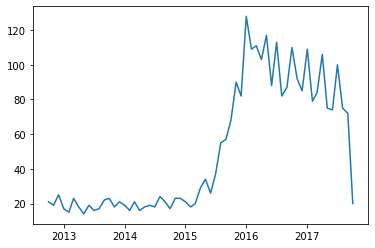

In [156]:
plt.plot(analysis1)

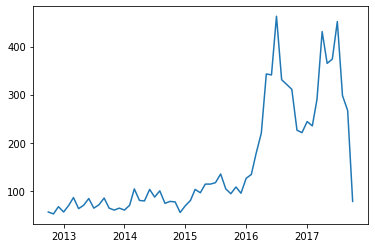

In [157]:
plt.plot(analysis2)

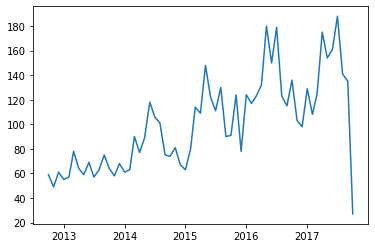

In [158]:
plt.plot(analysis3)

<h4> Stationarity Test

In [55]:
from statsmodels.tsa.stattools import adfuller

In [56]:
test_result=adfuller(analysis1['top 1'])

In [57]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(trend):
    result=adfuller(trend)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [159]:
adfuller_test(analysis1['top 1'])

ADF Test Statistic : -1.540277124599246
p-value : 0.5135011471159528
#Lags Used : 9
Number of Observations Used : 51
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [160]:
adfuller_test(analysis2['top 2'])

ADF Test Statistic : -1.748653203049969
p-value : 0.4062351068151592
#Lags Used : 10
Number of Observations Used : 50
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [161]:
adfuller_test(analysis3['top 3'])

ADF Test Statistic : -1.4177125174646696
p-value : 0.5737556771020154
#Lags Used : 8
Number of Observations Used : 52
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<h4> So the dataset is not stationary and it has trend in it

In [61]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

<h4> for top 1

In [62]:
analysis1.shape

(61, 1)

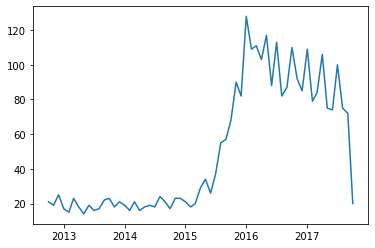

In [63]:
plt.plot(analysis1)

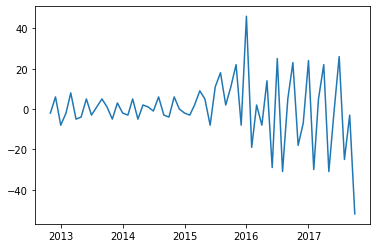

In [64]:
plt.plot(analysis1.diff().dropna())

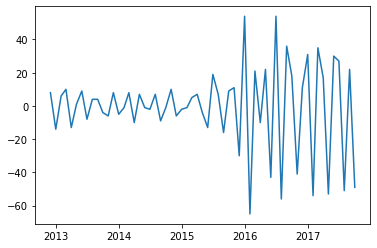

In [65]:
plt.plot(analysis1.diff().diff().dropna())

<h3>ACF Graphs

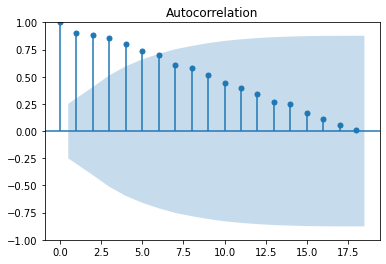

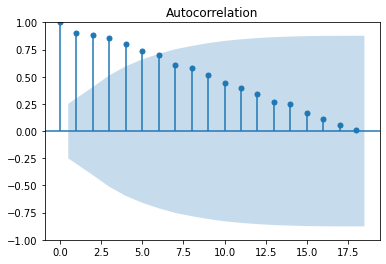

In [66]:
plot_acf(analysis1)

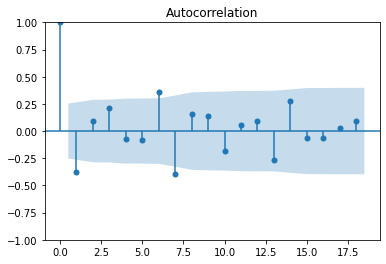

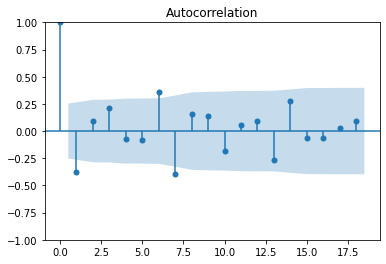

In [67]:
plot_acf(analysis1.diff().dropna())

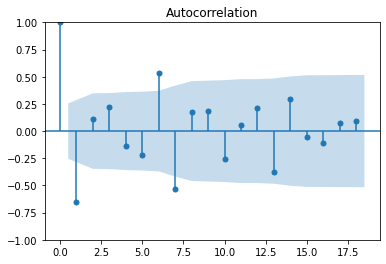

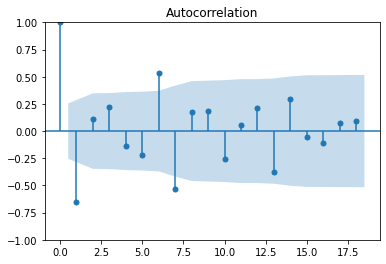

In [68]:
plot_acf(analysis1.diff().diff().dropna())

<h4> after 1 differencing the lag goes into the far negative zone fairly quick<br> so we have to look 0 to 1

<h4> for identifying value range of <b>q</b> for ARIMA(p,d,q) q=6 to 7  as it goes negative zone<br> so we have to look 0 to 7 

<h3> PACF Graphs

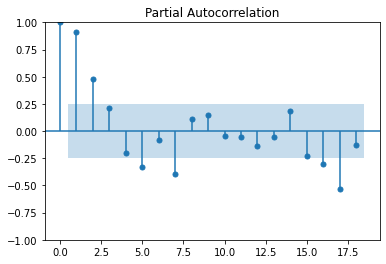

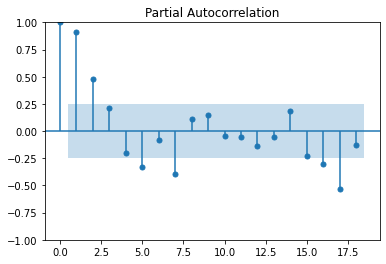

In [69]:
plot_pacf(analysis1)

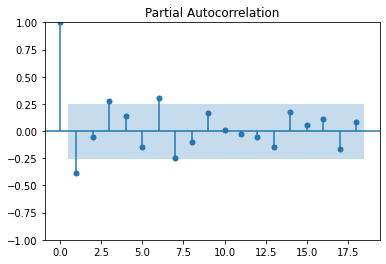

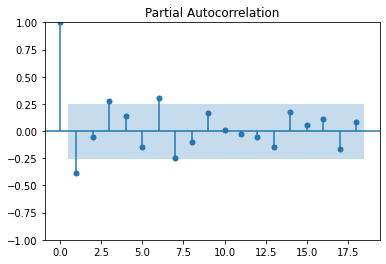

In [70]:
plot_pacf(analysis1.diff().dropna())

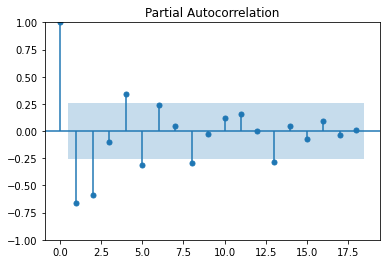

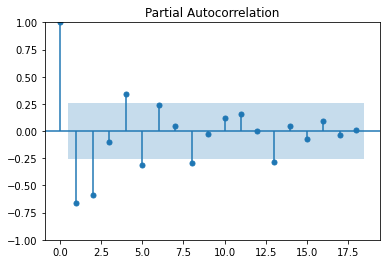

In [71]:
plot_pacf(analysis1.diff().diff().dropna())

for identifying value range of <b>p</b> for ARIMA(p,d,q) 
p = 3,4 as the graph goes below critical limit

In [72]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

<h3> Hyperparameter Tuning

In [74]:
p_values_top_1 = range(0,5)
d_values_top_1 = range(0,3)
q_values_top_1 = range(0,8)

In [75]:
# err_list_top1 = param_tuning(p_values_top_1,d_values_top_1,q_values_top_1)

<h4> for top 2

In [76]:
analysis2.shape

(61, 1)

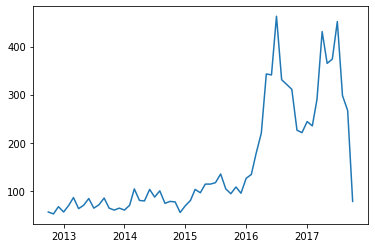

In [77]:
plt.plot(analysis2)

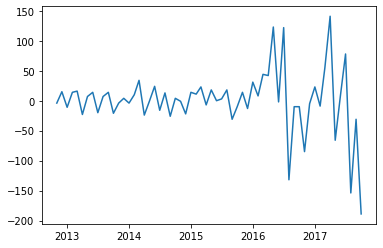

In [78]:
plt.plot(analysis2.diff().dropna())

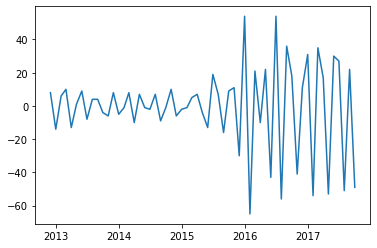

In [79]:
plt.plot(analysis1.diff().diff().dropna())

<h3>ACF Graphs

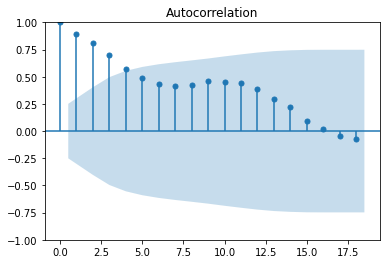

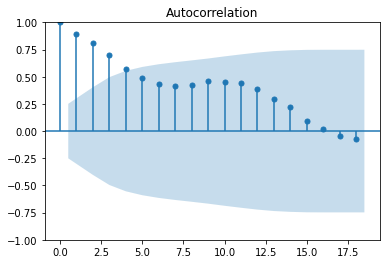

In [80]:
plot_acf(analysis2)

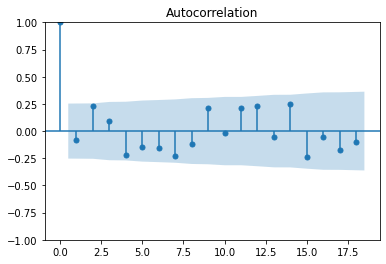

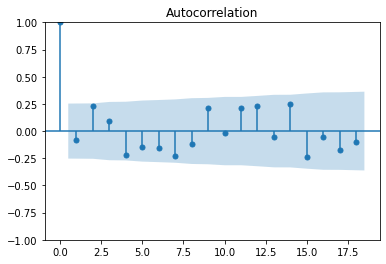

In [81]:
plot_acf(analysis2.diff().dropna())

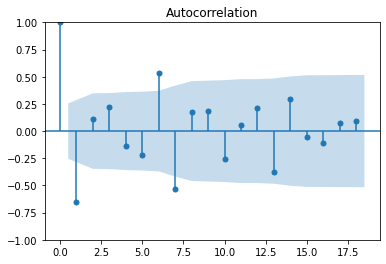

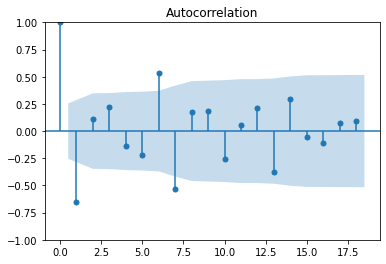

In [82]:
plot_acf(analysis1.diff().diff().dropna())

<h4> after 1 differencing the lag goes into the far negative zone fairly quick 

<h4> for identifying value range of <b>q</b> for ARIMA(p,d,q) at q=4,5 it goes critical zone

<h3> PACF Graphs

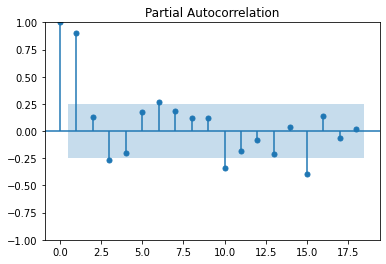

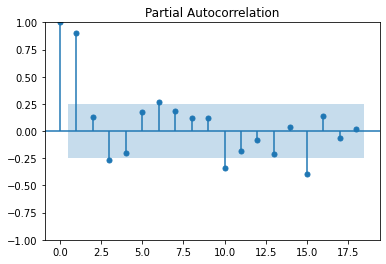

In [83]:
plot_pacf(analysis2)

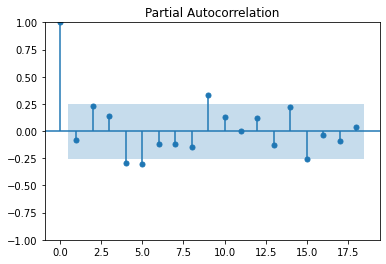

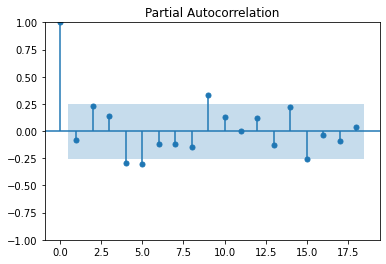

In [84]:
plot_pacf(analysis2.diff().dropna())

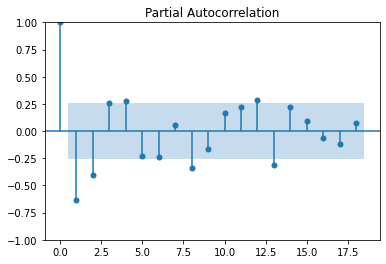

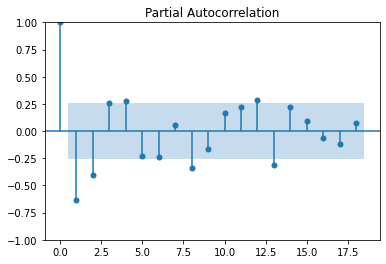

In [85]:
plot_pacf(analysis2.diff().diff().dropna())

for identifying value range of <b>p</b> for ARIMA(p,d,q) 
p = 1,2 as the graph goes below critical limit

<h3> Hyperparameter Tuning

In [86]:
p_values_top_2= range(0,3)
d_values_top_2 = range(0,3)
q_values_top_2 = range(0,7)

<h4> for top 3

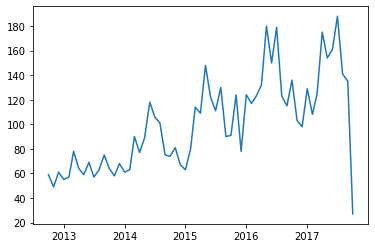

In [87]:
plt.plot(analysis3)

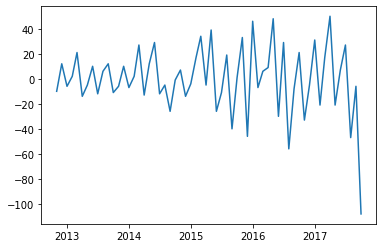

In [88]:
plt.plot(analysis3.diff().dropna())

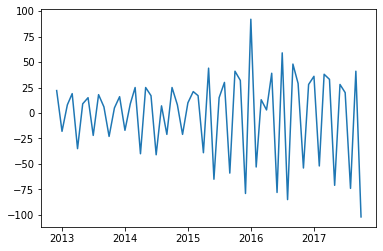

In [89]:
plt.plot(analysis3.diff().diff().dropna())

<h3>ACF Graphs

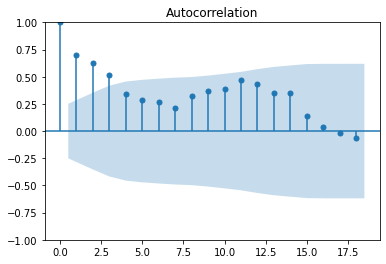

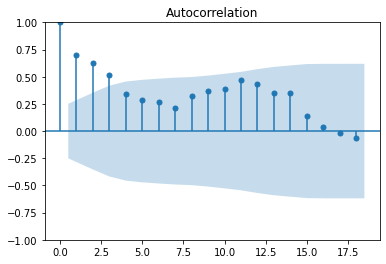

In [90]:
plot_acf(analysis3)

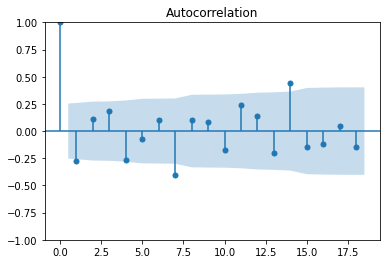

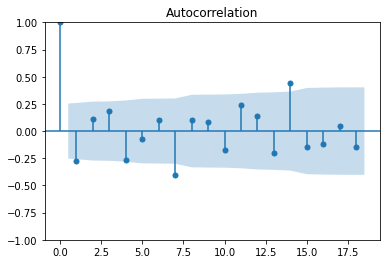

In [91]:
plot_acf(analysis3.diff().dropna())

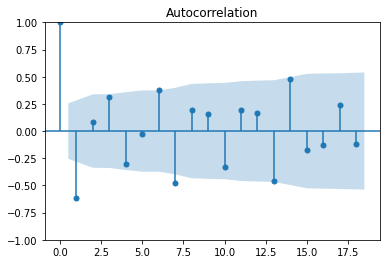

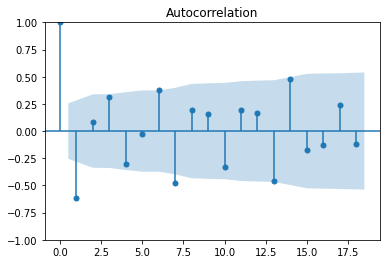

In [92]:
plot_acf(analysis3.diff().diff().dropna())

<h4> after 1 differencing the lag goes into the far negative zone fairly quick 

<h4> for identifying value range of <b>q</b> for ARIMA(p,d,q) at q=4,5 it goes critical zone

<h3> PACF Graphs

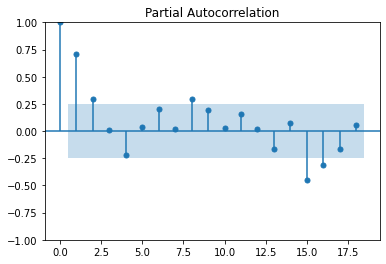

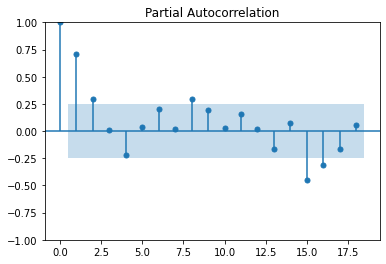

In [93]:
plot_pacf(analysis3)

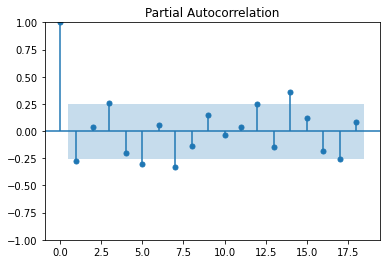

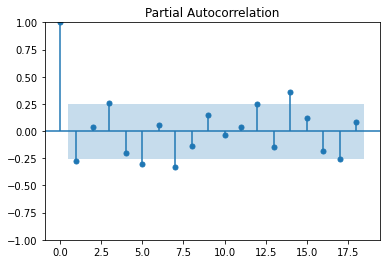

In [94]:
plot_pacf(analysis3.diff().dropna())

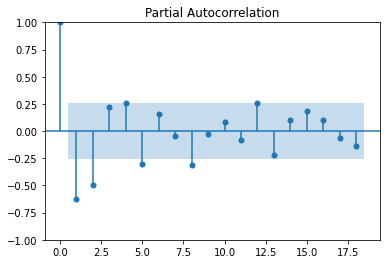

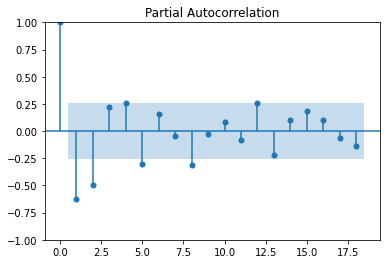

In [95]:
plot_pacf(analysis3.diff().diff().dropna())

<h4>for identifying value range of <b>p</b> for ARIMA(p,d,q) 
p = 2,3 as the graph goes below critical limit

In [96]:
p_values_top_3 = range(0,4)
d_values_top_3 = range(0,2)
q_values_top_3 = range(0,5)

In [73]:
def param_tuning(p_values,d_values,q_values,analysis):
    errs_list=[]
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                train , test = analysis[0:45],analysis[45:]
                predictions = list()
                for i in range(len(test)):
                    model = ARIMA(train,order=order)
                    model_fit = model.fit()
                    pred_y = model_fit.forecast()[0]
                    predictions.append(pred_y)
                error = mean_squared_error(test,predictions)
                err_dict = {'ARIMA':order,'Error':error}
                errs_list.append(err_dict)
                # print("ARIMA {},MSE = {}".format(order,error))
    return errs_list

In [97]:
err_list_top1 = param_tuning(p_values_top_1,d_values_top_1,q_values_top_1,analysis1)
err_list_top2 = param_tuning(p_values_top_2,d_values_top_2,q_values_top_2,analysis2)
err_list_top3 = param_tuning(p_values_top_3,d_values_top_3,q_values_top_3,analysis3)

<h4> finding best hyper prameters in estimated range 

In [136]:
sorted_err_top1 = sorted(err_list_top1, key=lambda k: k['Error']) 
sorted_err_top2 = sorted(err_list_top2, key=lambda k: k['Error']) 
sorted_err_top3 = sorted(err_list_top3, key=lambda k: k['Error']) 

In [137]:
print(sorted_err_top1[0])
print(sorted_err_top2[0])
print(sorted_err_top3[0])

{'ARIMA': (4, 2, 4), 'Error': 466.5905627291469}
{'ARIMA': (0, 0, 5), 'Error': 9216.255235872906}
{'ARIMA': (1, 0, 0), 'Error': 1455.7361873488198}


In [99]:
model_top1 = ARIMA(analysis1,order=(4,0,4))
model_top2 = ARIMA(analysis2,order=(0,0,5))
model_top3 = ARIMA(analysis3,order=(1,0,0))

In [100]:
model_top1_fit = model_top1.fit()
model_top2_fit = model_top2.fit()
model_top3_fit = model_top3.fit()

In [101]:
model_top1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  top 1   No. Observations:                   61
Model:                 ARIMA(4, 0, 4)   Log Likelihood                -240.186
Date:                Wed, 06 Apr 2022   AIC                            500.373
Time:                        21:24:20   BIC                            521.482
Sample:                    10-01-2012   HQIC                           508.646
                         - 10-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.9182     47.001      0.913      0.361     -49.202     135.038
ar.L1          0.0415      0.401      0.103      0.918      -0.745       0.828
ar.L2          0.5013      0.426      1.178      0.239      -0.333       1.335
ar.L3          0.6018      0.383      1.573      0.116      -0.148       1.352
ar.L4         -0.3302      0.430     -0.768      0.443      -1.173       0.513
ma.L1          0.4253     18.487      0.023      0.982     -35.809      36.659
ma.L2          0.1359      3.255      0.042      0.967      -6.244       6.516
ma.L3          0.1994     11.160      0.018      0.986     -21.674      22.072
ma.L4          0.8518     20.507      0.042      0.967     -39.342      41.045
sigma2       136.9075   3255.032      0.042      0.966   -6242.839    6516.654
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               301.66
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              18.24   Skew:                            -1.47
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [102]:
model_top2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  top 2   No. Observations:                   61
Model:                 ARIMA(0, 0, 5)   Log Likelihood                -324.022
Date:                Wed, 06 Apr 2022   AIC                            662.044
Time:                        21:24:20   BIC                            676.820
Sample:                    10-01-2012   HQIC                           667.835
                         - 10-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        142.1224     32.843      4.327      0.000      77.752     206.493
ma.L1          0.4952      0.175      2.826      0.005       0.152       0.839
ma.L2          1.1610      0.555      2.093      0.036       0.074       2.248
ma.L3          0.8945      0.163      5.493      0.000       0.575       1.214
ma.L4          0.4252      0.222      1.915      0.055      -0.010       0.860
ma.L5          0.7371      0.385      1.914      0.056      -0.018       1.492
sigma2      2131.9502   1078.408      1.977      0.048      18.310    4245.590
===================================================================================
Ljung-Box (L1) (Q):                   5.46   Jarque-Bera (JB):                19.45
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):              12.25   Skew:                             0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [103]:
model_top3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  top 3   No. Observations:                   61
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -284.452
Date:                Wed, 06 Apr 2022   AIC                            574.904
Time:                        21:24:20   BIC                            581.237
Sample:                    10-01-2012   HQIC                           577.386
                         - 10-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.1852     16.712      5.696      0.000      62.431     127.940
ar.L1          0.7510      0.114      6.599      0.000       0.528       0.974
sigma2       648.5883     82.230      7.888      0.000     487.421     809.756
===================================================================================
Ljung-Box (L1) (Q):                   1.34   Jarque-Bera (JB):                16.90
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):               7.25   Skew:                            -0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='month_year'>

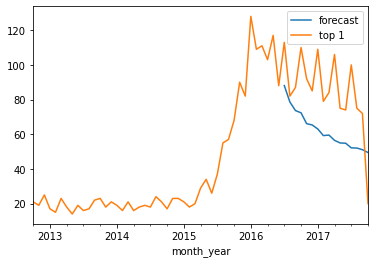

In [172]:
analysis_model1 = analysis1.copy()
analysis_model1['forecast'] = model_top1_fit.predict(start=45,end=61,dynamic=True)
analysis_model1[['forecast','top 1']].plot()

<AxesSubplot:xlabel='month_year'>

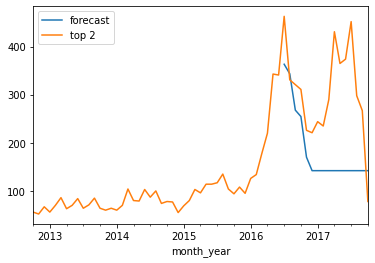

In [174]:
analysis_model2 = analysis2.copy()
analysis_model2['forecast'] = model_top2_fit.predict(start=45,end=61,dynamic=True)
analysis_model2[['forecast','top 2']].plot()

<AxesSubplot:xlabel='month_year'>

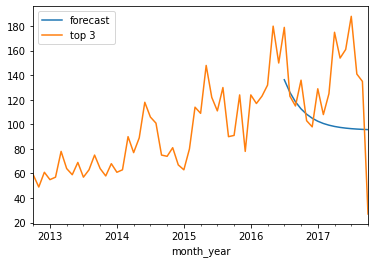

In [173]:
analysis_model3 = analysis3.copy()
analysis_model3['forecast'] = model_top3_fit.predict(start=45,end=61,dynamic=True)
analysis_model3[['forecast','top 3']].plot()

<h3> 4

<h4>ARIMA is a parametric method and it should work better for relatively short series of time.<br>
    It is a purely statistical approaches.ARIMA models only need the historical data of a time series to generalize the forecast and manage<br>
    Deep neural network could be used like RNN, LSTM, transformer and so on.. <br>For keep it simple ARIMA is used 

In [165]:
print(sorted_err_top1[0])
print(sorted_err_top2[0])
print(sorted_err_top3[0])

{'ARIMA': (4, 2, 4), 'Error': 466.5905627291469}
{'ARIMA': (0, 0, 5), 'Error': 9216.255235872906}
{'ARIMA': (1, 0, 0), 'Error': 1455.7361873488198}


In [ ]:
pred_top1 = pred_df[col_top1]
pred_top2 = pred_df[col_top2]
pred_top3 = pred_df[col_top3]

In [181]:
def calc_error(df,df_pred,col_top,name):
    i=0
    for col in col_top:
        i+=1
        error = mean_squared_error(df[45:61],df_pred[col][45:61])
        print('error for {} of fit {} is {}'.format(name,i,error))
    

In [178]:
error_calc1 = process_pred(no_of_month=1,df =pred_top1)
error_calc2 = process_pred(no_of_month=1,df =pred_top2)
error_calc3 = process_pred(no_of_month=1,df =pred_top3)

In [185]:
calc_error(analysis1,error_calc1,col_top1,'top 1')

error for top 1 of fit 1 is 23047.40813440134
error for top 1 of fit 2 is 23155.621304849195
error for top 1 of fit 3 is 23171.134412193605


In [186]:
print('custom model error is {} '.format(sorted_err_top1[0]))

custom model error is {'ARIMA': (4, 2, 4), 'Error': 466.5905627291469} 


In [187]:
calc_error(analysis2,error_calc2,col_top2,'top 2')

error for top 2 of fit 1 is 375233.64364204055
error for top 2 of fit 2 is 256358.46638085673
error for top 2 of fit 3 is 213981.81031082687


In [188]:
print('custom model error is {} '.format(sorted_err_top2[0]))

custom model error is {'ARIMA': (0, 0, 5), 'Error': 9216.255235872906} 


In [189]:
calc_error(analysis3,error_calc3,col_top3,'top 3')

error for top 3 of fit 1 is 65876.50624389025
error for top 3 of fit 2 is 60926.614338017505
error for top 3 of fit 3 is 60294.61465948057


In [190]:
print('custom model error is {} '.format(sorted_err_top2[0]))

custom model error is {'ARIMA': (0, 0, 5), 'Error': 9216.255235872906} 


<h4> So in each case custom model has performed better than given predictions